In [1]:
#importing neccessary imports
import numpy as np
import matplotlib.pyplot as plt     
import seaborn as sns   
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

In [3]:
data = pd.read_csv('datasets/covid19_Confirmed_dataset.csv')

In [12]:
data_melted = data.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                    var_name='Date', 
                    value_name='Cases')
data_melted['Date'] = pd.to_datetime(data_melted['Date'])
data_aggregated = data_melted.groupby(['Country/Region', 'Date']).sum().reset_index()



C:\Users\sahil\AppData\Local\Temp\ipykernel_4884\3786319870.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_melted['Date'] = pd.to_datetime(data_melted['Date'])


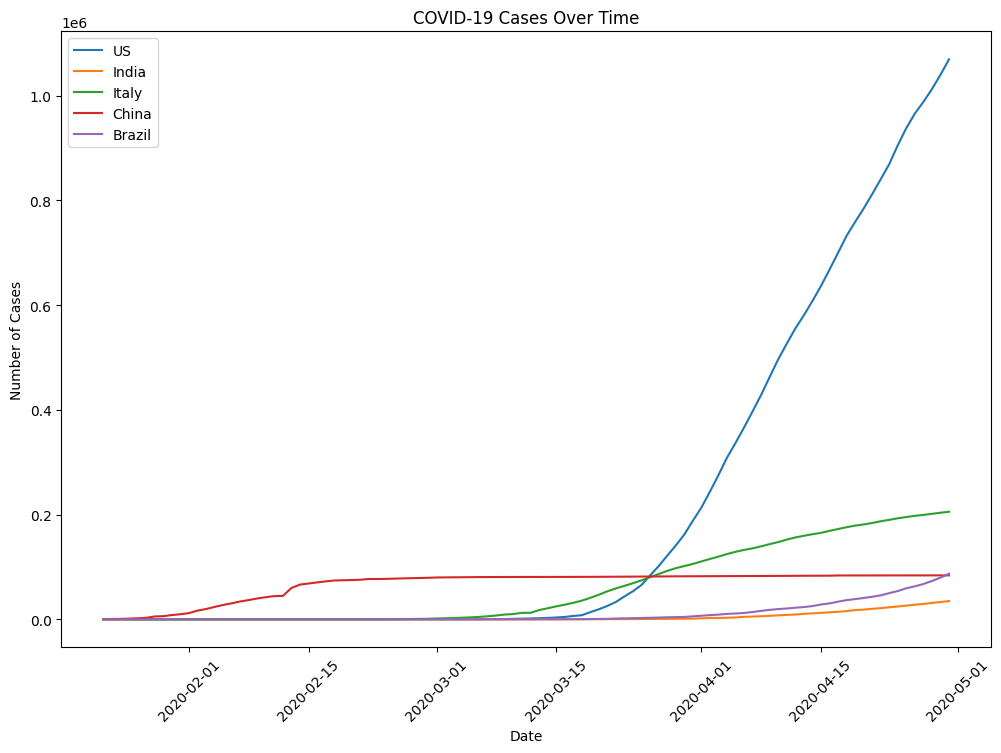

In [14]:
plt.figure(figsize=(12, 8))
countries = ['US', 'India', 'Italy', 'China', 'Brazil']
for country in countries:
    country_data = data_aggregated[data_aggregated['Country/Region'] == country]
    plt.plot(country_data['Date'], country_data['Cases'], label=country)

plt.title('COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.xticks(rotation=45)
plt.show()


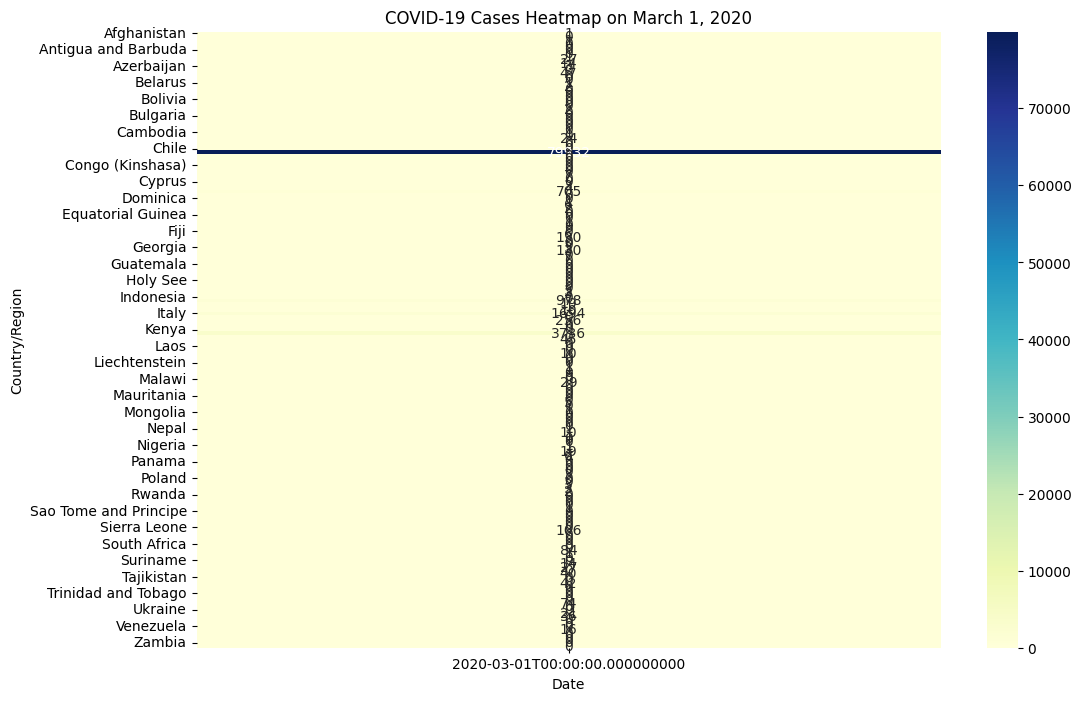

In [21]:
heatmap_data = data_aggregated[data_aggregated['Date'] == '2020-03-01']
heatmap_data = heatmap_data.pivot(index='Country/Region', columns='Date', values='Cases')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="g")
plt.title('COVID-19 Cases Heatmap on March 1, 2020')
plt.show()


In [23]:
latest_data = data_melted[data_melted['Date'] == data_melted['Date'].max()]

fig = px.scatter_geo(latest_data, lat='Lat', lon='Long', hover_name='Country/Region',
                     size='Cases', title='COVID-19 Worldwide Cases',
                     projection="natural earth")

fig.show()
